# Classification_Problem

The dataset inscludes 34 columns which categorized 3,000+ counties in the United States. The columns include total population, percentage of unemployment, percentage of child in poverty, among other variables. This firts attempt to explore poverty in counties classifies the counties using XX: Employed, Unemployment,  variables.  
Data Source: U.S Census 

In [1]:
#Dependencies 
%matplotlib inline
%matplotlib notebook
import numpy as np
import scipy as sp
import pandas as pd
import sklearn 
import seaborn as sns
from matplotlib import pyplot as plt
%pylab notebook
import sklearn.cross_validation

Populating the interactive namespace from numpy and matplotlib


C:\dev\envs\PythonData\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read the data
data = pd.read_csv('county_data_2015_s.csv', index_col=0)
data.head()
data.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,IncomePerCap,Poverty,ChildPoverty,Professional,Drive,Employed,Unemployment
count,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000
mean,1.008009e+05,4.959687e+04,5.120403e+04,8.818949,77.308949,8.885064,1.763248,1.252516,0.073567,24330.726433,16.698408,23.293503,31.045032,79.103185,4.641645e+04,7.814682
std,3.231274e+05,1.585590e+05,1.646062e+05,13.491365,19.900840,14.392654,7.337118,2.635657,0.398150,5820.493486,6.583492,10.242802,6.393021,7.619257,1.514770e+05,3.559907
min,2.670000e+02,1.360000e+02,1.310000e+02,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,8292.000000,1.400000,0.000000,13.500000,5.200000,1.660000e+02,0.000000
25%,1.103550e+04,5.550750e+03,5.487750e+03,1.900000,65.675000,0.600000,0.100000,0.200000,0.000000,20469.500000,12.000000,16.100000,26.700000,76.600000,4.532000e+03,5.500000
50%,2.579300e+04,1.283800e+04,1.291550e+04,3.700000,84.650000,2.100000,0.300000,0.500000,0.000000,23574.500000,16.000000,22.500000,30.000000,80.600000,1.065700e+04,7.500000
75%,6.762050e+04,3.332750e+04,3.412275e+04,9.000000,93.325000,10.200000,0.600000,1.200000,0.000000,27138.000000,20.300000,29.500000,34.425000,83.600000,2.927150e+04,9.700000
max,1.003839e+07,4.945351e+06,5.093037e+06,98.700000,99.800000,85.900000,92.100000,41.600000,11.100000,65600.000000,53.300000,72.300000,74.000000,94.600000,4.635465e+06,29.400000


In [3]:
data.columns

Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'IncomePerCap', 'Poverty',
       'ChildPoverty', 'Professional', 'Drive', 'Employed', 'Unemployment'],
      dtype='object')

In [4]:
data = data.drop('State', axis =1)

In [5]:
data = data.drop('County', axis =1)

In [6]:
data.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,IncomePerCap,Poverty,ChildPoverty,Professional,Drive,Employed,Unemployment
CensusId,,,,,,,,,,,,,,,,
1001,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,24974,12.9,18.6,33.2,87.5,23986,7.6
1003,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,27317,13.4,19.2,33.1,84.7,85953,7.5
1005,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,16824,26.7,45.3,26.8,83.8,8597,17.6
1007,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,18431,16.8,27.9,21.5,83.2,8294,8.3
1009,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,20532,16.7,27.2,28.5,84.9,22189,7.7


In [7]:
#data.columns

For a classification problem, 
Feature data: usually labeled as X. 
Target data, labeled Y. Y is a vector which contains the class of all datapoints.
Every row in the matrix X is a datapoint (i.e. a county) and every column in X is a feature of the data (e.g. poverty). 

The target variable will be unemployment column. This, I am going to save it in the unemploymentcolumn as a separate numpy array (labeled Y). Finally, I will remove/drop the unemployment column from the dataframe.

In [8]:
Y = data.Poverty.values
data = data.drop('Poverty', axis =1)
# To make the problem more simple its determined as a binary one. 
#5 is obtained from the mean of the Y(original) column 
Y = np.asarray([1 if i>=16 else 0 for i in Y])

In [9]:
X = data.as_matrix()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [11]:
scores = []
# n_estimators = # of trees
for val in range(1,5):
    clf = RandomForestClassifier(n_estimators = val)
    validated = cross_val_score(clf, X, Y, cv = 10)
    scores.append(validated)

<IPython.core.display.Javascript object>


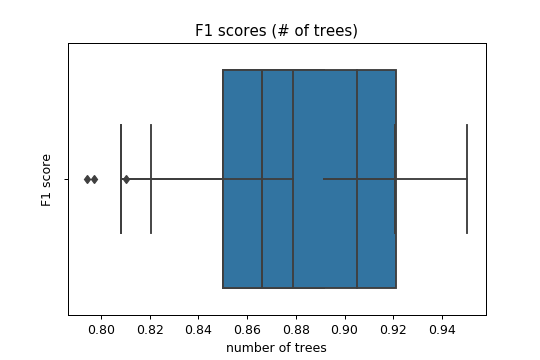

In [12]:
sns.boxplot(scores)
plt.xlabel('number of trees')
plt.ylabel('Classification scores')
plt.title('Classification score for number of trees')
plt.show()

In [13]:
#2 trees
clf = RandomForestClassifier(n_estimators = 2)
validated = cross_val_score(clf, X, Y, cv = 10)
validated

array([0.91428571, 0.86031746, 0.85714286, 0.84713376, 0.89171975,
       0.82802548, 0.89171975, 0.8370607 , 0.85623003, 0.79872204])

In [14]:
sns.boxplot(scores)
plt.xlabel('number of trees')
plt.ylabel('Classification scores')
plt.title('Classification score for number of trees')
plt.show()

In [15]:
scores = []
# n_estimators = # of trees
for val in range(1,20):
    clf = RandomForestClassifier(n_estimators = val)
    validated = cross_val_score(clf, X, Y, cv = 10, scoring = 'f1')
    scores.append(validated)

In [16]:
sns.boxplot(scores)
plt.xlabel('number of trees')
plt.ylabel('F1 score')
plt.title('F1 scores (# of trees)')
plt.show()

In [17]:
from sklearn import tree
import pandas as pd
import pylab as pl

In [18]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [19]:
clf.feature_importances_

array([0.01248498, 0.01215286, 0.01233207, 0.00987823, 0.02915283,
       0.02623519, 0.01385755, 0.00739809, 0.00469235, 0.07407138,
       0.71463413, 0.02520964, 0.02246521, 0.01356242, 0.02187308])

In [65]:
#data.columns.values

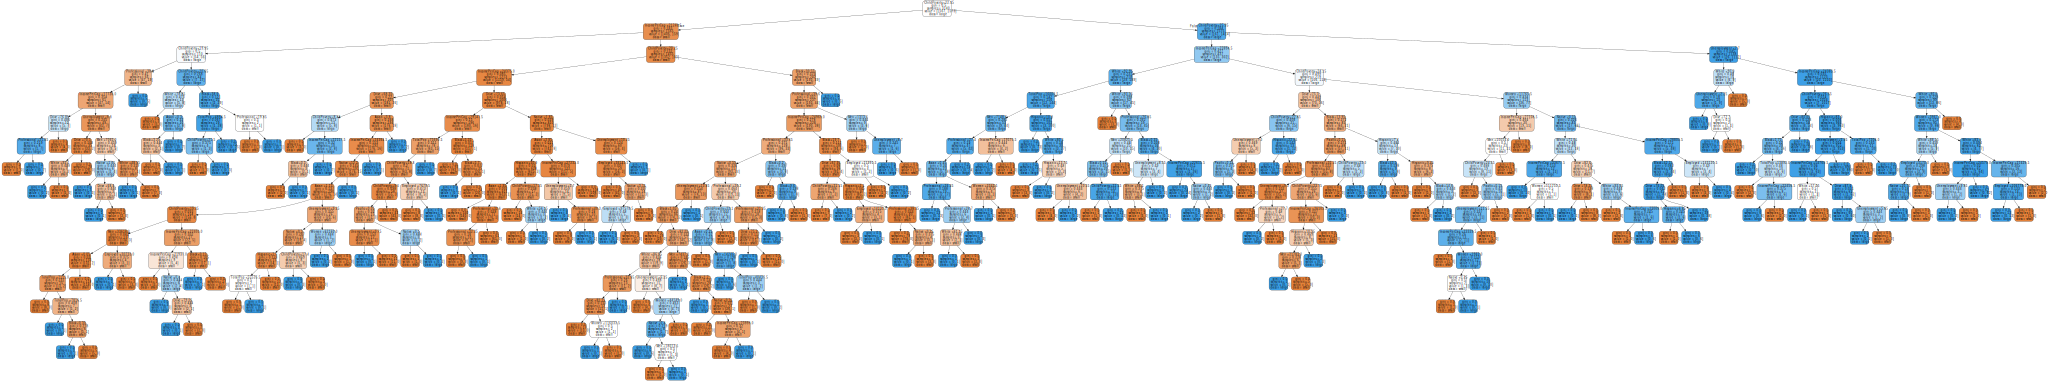

In [21]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names= data.columns,  
    class_names=["small", "large"],  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('dtreethree.png')

graph = graphviz.Source(dot_data)  
graph 